In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

In [93]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [4]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Align.Applications import MuscleCommandline

In [18]:
from Bio import Phylo

In [19]:
tree = Phylo.read('tree.nwk', 'newick')

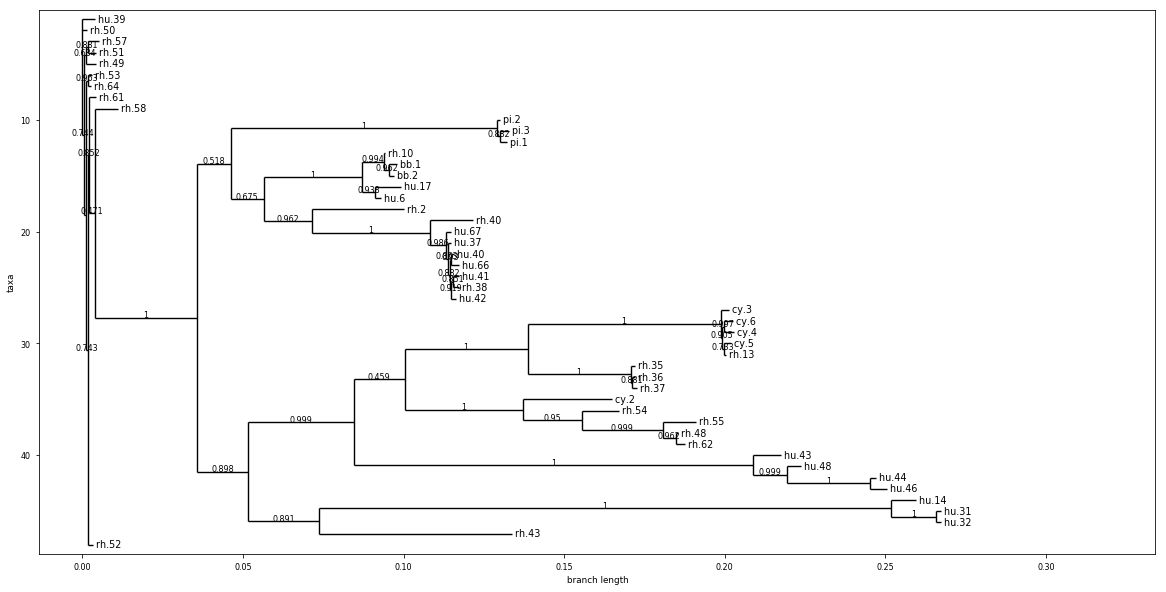

In [33]:
Phylo.draw(tree)

In [50]:
sequences = [x for x in SeqIO.parse("seqs.fa", "fasta")]

In [61]:
picked_sequences = ["pi.3", "hu.66", "cy.6", "rh.51", "rh.52"]

In [62]:
[print(x.id,":", x.seq, "\n\n") for x in sequences if x.id in picked_sequences]

cy.6 : atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacttgaaacctggagccccgaaacccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggagagccggtcaacgaggcagacgccgcggccctcgagcacgacaaggcctacgacaagcagctcgagcagggggacaacccgtacctcaagtacaaccacgccgacgctgagtttcaggagcgtcttcaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagacccatagaatcccccgactcctccacgggcatcggcaagaaaggccagcagcccgctaaaaagaagctcaactttgggcagactggcgactcagagtcagtgcccgacccccaacctctcggagaacctcccgccgcgccctcaggtctgggatctggtacaatggctgcaggcggtggcgcaccaatggcagacaataacgaaggcgccgacggagtgggtaatgcctccggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgcacctgggccctgcccacctacaacaaccacctctacaagcagatatcaagtcagagcggggctaccaacgacaaccacttcttcggctacagcaccccctggggctattttgacttcaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccagaaagctgcggttcaagttgttcaacatccaggtcaaggaggtcacgacgaacgacggcgttacgaccatcgctaataac

[None, None, None, None, None]

In [64]:
cluster1 = ["pi.2", "pi.3", "pi.1"]
cluster2 = ["rh.10", "bb.1", "bb.2", "hu.17", "hu.6"]
cluster3 = ["cy.3", "cy.6", "cy.4", "cy.5", "rh.13"]
cluster4 = ["hu.39", "rh.50", "rh.57", "rh.51", "rh.49", "rh.53", "rh.64", "rh.61", "rh.58"]
clusters = [cluster1, cluster2, cluster3, cluster4]

In [65]:
seq_clusters = [[x for x in sequences if x.id in ids] for ids in clusters]

In [77]:
clusters_gc = [];
clusters_at = [];
for seq_cluster in seq_clusters:
    curr_cluster_gc = [];
    curr_cluster_at = [];
    for i in range(len(seq_cluster[0].seq)):
            at = 0;
            gc = 0;
            for seq in seq_cluster:
                if seq[i] == "a" or seq[i] == "t":
                    at+=1;
                else: gc+=1;
            curr_cluster_gc += [gc/(gc+at)]
            curr_cluster_at += [at/(gc+at)]
    clusters_gc += [curr_cluster_gc]
    clusters_at += [curr_cluster_at]

In [78]:
import numpy as np

C:\Users\kathe\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


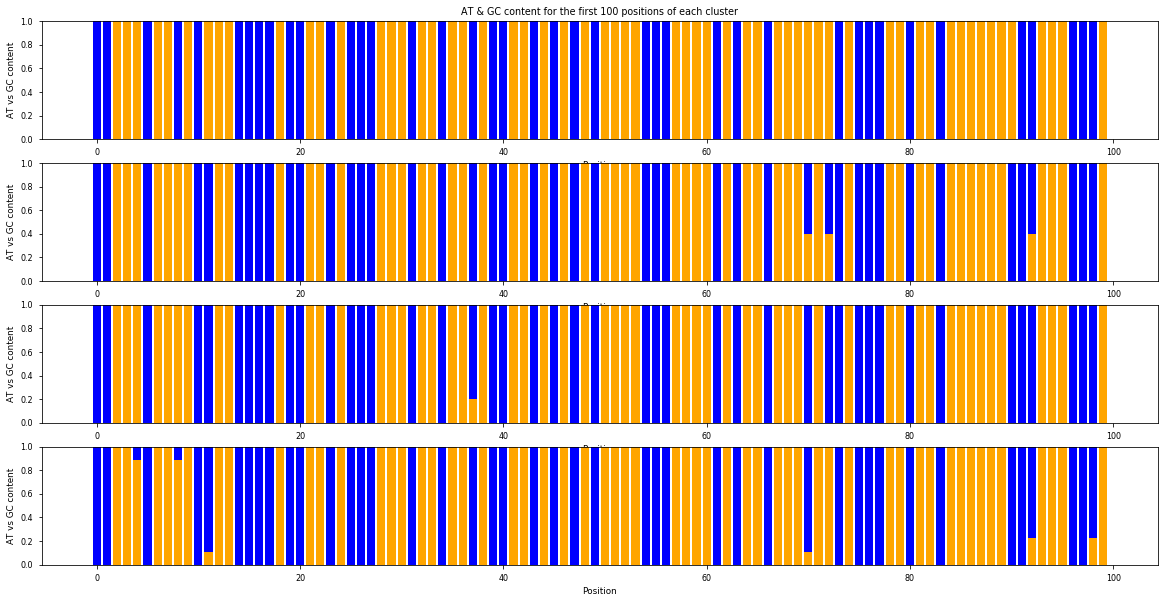

In [94]:
plt.subplot(len(clusters_gc), 1, 1)
plt.title("AT & GC content for the first 100 positions of each cluster")
for i in range(len(clusters_gc)):
    plt.subplot(len(clusters_gc), 1, i+1)
    plt.bar(np.arange(100), clusters_gc[i][:100], color = "orange")
    plt.bar(np.arange(100), clusters_at[i][:100], bottom = clusters_gc[i][:100], color = "blue")
    plt.xlabel("Position")
    plt.ylabel("AT vs GC content")

In [95]:
cluster_lens = [[len(seq.seq) for seq in seq_clu] for seq_clu in seq_clusters]

Text(0.5,1,'Sequence length per cluster')

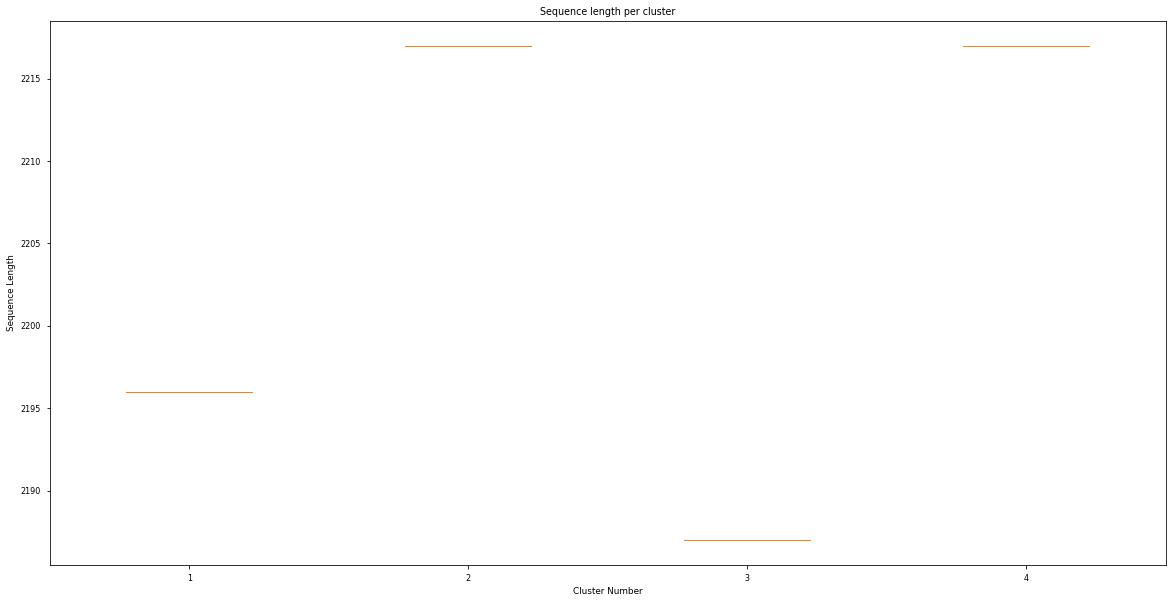

In [98]:
plt.boxplot(cluster_lens)
plt.xlabel("Cluster Number")
plt.ylabel("Sequence Length")
plt.title("Sequence length per cluster")